# Compare Beer Lambert with Delta-Eddington Radiative Transfer Code

Transmisivity, radiative flux and Photosynthetically Active Radiation from a Beer Lambert [@stroeveetal2021] and a Delta-Eddington [@briegliebandlight????] Radiative Transfer model are compared.  The Delta-Eddington model calculates downwelling radiative flux at the surface based on day of year and an atmospheric profile of temperature, water vapour, etc.  These estimates are used (initially) as input to the Beer-Lambert model.  

In [1]:
import os
import sys

if '../src' not in sys.path:
    sys.path.insert(0, '../src/')

import numpy as np
import matplotlib.pyplot as plt

from beer_lambert_rt.model import run_model as beer_lambert_model

from filepath import DATAPATH
from loader import load_seaicert_output


filepath = DATAPATH / 'magna+gem2-transect-20200627_PS122-4_44-267_transect.deflux.csv'

In [2]:
df = load_seaicert_output(filepath)

#_The Beer-Lambert model does not currently calculate for pond depth, so I drop columns with pond_depth greater than zero_

drop_index = df[df.melt_pond_depth_m > 0.].index
df = df.drop(drop_index) 

df.head()

/home/apbarret/src/compare_radiative_transfer_codes/notebooks/../src/loader.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return pd.read_csv(filepath, index_col=0, parse_dates=True)


,datetime,latitude,snow_depth_m,melt_pond_depth_m,ice_thickness_mean_m,sw_absorbed_by_ocean,downwelling_radiative_flux_absorbed_by_ocean,surface_albedo,surface_downwelling_radiative_flux,transect_distance_m.1,par_absorbed_by_ocean
transect_distance_m,,,,,,,,,,,
0.000000,2020-06-27 11:22:46,81.95278,0.05502,0.0,3.521437,0.256733,0.256733,0.848763,361.213745,0.000000,0.898566
5.616941,2020-06-27 11:22:55,81.95277,0.05277,0.0,3.667773,0.223884,0.223884,0.847527,360.627350,5.616941,0.783593
11.263374,2020-06-27 11:23:09,81.95272,0.09930,0.0,3.426157,0.170409,0.170409,0.862632,367.934998,11.263374,0.596432
19.177656,2020-06-27 11:23:17,81.95270,0.09980,0.0,2.872571,0.318801,0.318801,0.862701,367.969910,19.177656,1.115803
26.356972,2020-06-27 11:23:24,81.95268,0.06230,0.0,3.049500,0.399520,0.399520,0.852221,362.867432,26.356972,1.398322


In [3]:
bl_flux, bl_par = beer_lambert_model(
    df.ice_thickness_mean_m, 
    df.snow_depth_m, 
    df.surface_albedo, 
    df.surface_downwelling_radiative_flux, 
    np.array([-5.]*len(df)), 
    np.array([1.]*len(df)),
    use_distribution=False)

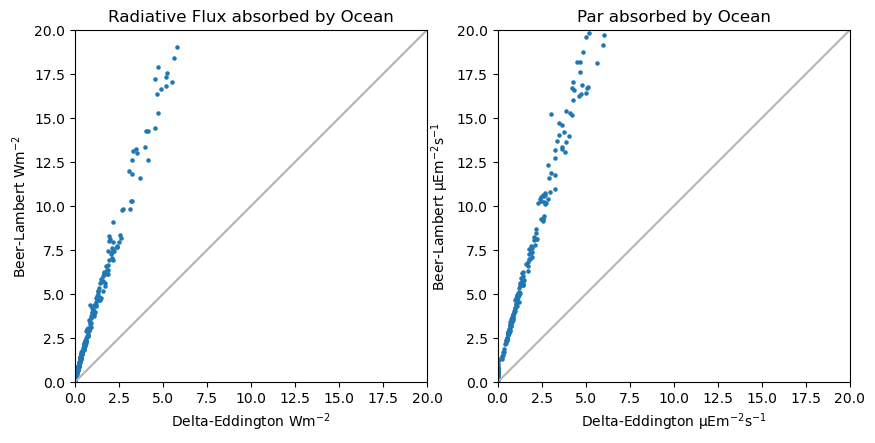

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10,7))

ax[0].scatter(df.downwelling_radiative_flux_absorbed_by_ocean, bl_flux, 5.)
ax[0].set_aspect("equal")
ax[0].set_xlim(0, 20)
ax[0].set_ylim(0, 20)
ax[0].set_xlabel('Delta-Eddington $\mathrm{W m^{-2}}$')
ax[0].set_ylabel('Beer-Lambert $\mathrm{W m^{-2}}$')
ax[0].set_title('Radiative Flux absorbed by Ocean')
ax[0].axline((0,0), (20.,20), c='0.7', zorder=1)

ax[1].scatter(df.par_absorbed_by_ocean, bl_par, 5.)
ax[1].set_aspect("equal")
ax[1].set_xlim(0, 20)
ax[1].set_ylim(0, 20)
ax[1].set_xlabel('Delta-Eddington $\mathrm{\mu E m^{-2} s^{-1}}$')
ax[1].set_ylabel('Beer-Lambert $\mathrm{\mu E m^{-2} s^{-1}}$')
ax[1].set_title('Par absorbed by Ocean')
ax[1].axline((0,0), (20.,20), c='0.7', zorder=1)

fig.savefig(filepath.name.replace('.deflux.csv', '.compare_rt_models.png'))